In [1]:
# Import all the necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
print(5)

5


In [4]:
all_comment = pd.read_csv('UScomments.csv', error_bad_lines= False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


In [5]:
# This is the sample of comments from US YouTube for each video:
all_comment

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


In [6]:
# Finding out missing values in the data:
all_comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691375 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [7]:
# Drop mmissing values:
all_comment.dropna(inplace = True)

In [8]:
all_comment.isnull().sum()
# There is no null value in the data

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

### 1.Analyse the positive and negative comments with TextBlob and WordCloud:

In [9]:
# Using TextBlob to create positive and negative comments in the data:

In [10]:
from textblob import TextBlob

In [11]:
# Example:
TextBlob('so good happy for you').sentiment.polarity

0.75

In [12]:
# Create a column that contains the polarity of each comment:
polarity = []
for comment in all_comment['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)
        

In [13]:
all_comment['polarity'] = polarity

In [14]:
all_comment.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [15]:
cmt_positive = all_comment[all_comment['polarity'] == 1]
cmt_negative = all_comment[all_comment['polarity'] == -1]

In [16]:
# This is the data where comments are positive (polarity = 1.0)
cmt_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [17]:
# And this is the data of negative comments (polarity = -1.0)
cmt_negative.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [18]:
# Using WordCloud to show which words are used the most in positive and negative comments:

In [19]:
from wordcloud import WordCloud, STOPWORDS

In [20]:
total_cmt_p = ''.join(cmt_positive['comment_text'])
total_cmt_n = ''.join(cmt_negative['comment_text'])

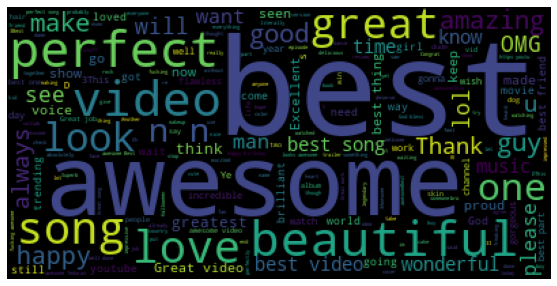

In [21]:
wordcloud = WordCloud(stopwords= set(STOPWORDS)).generate(total_cmt_p)
plt.figure(figsize = (12,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('positive')

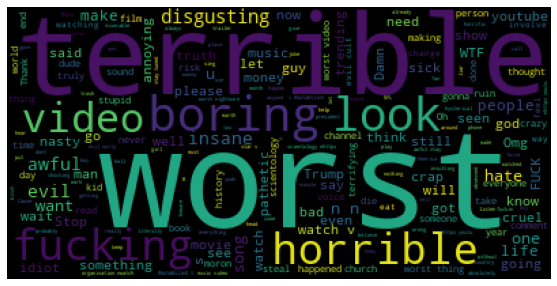

In [22]:
wordcloud = WordCloud(stopwords= set(STOPWORDS)).generate(total_cmt_n)
plt.figure(figsize = (12,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('negative')

### 2.Performing Emoji analysis

In [23]:
import emoji

In [24]:
# Creat a list of all emoji used in the comments
emoji_list = []
for comment in all_comment['comment_text']:
    for char in comment:
        if char in emoji.UNICODE_EMOJI_ENGLISH:
            emoji_list.append(char)

In [25]:
from collections import Counter
# This library help us to count the emoji values.

In [26]:
common_emo = Counter(emoji_list).most_common(10)
# Count and extract top 10 common emoji used.

In [27]:
common_emo

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [28]:
emo = [common_emo[i][0] for i in range(10)]
emo
# Take out 10 emoji for x-axis values.

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [29]:
freq = [common_emo[i][1] for i in range(10)]
freq
# Take out their count for y-axis values.

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [30]:
# Now we have x-axis and y-axis so this is time for building a bar chart.
import plotly.graph_objs as go
from plotly.offline import iplot

In [111]:
trace = go.Bar(x = emo, y = freq, width= 0.7)
iplot([trace])

#### Comment: As we can see, most of them are happy, like, encourage... emoji. We can see that viewers use more emoji when they love the video. The more they use emoji, the more they love your video. If people didnt use emoji in their comment, you can consider that if they don't like your video or not.

### (*) Collecting the YouTube video data

In [32]:
# Import the additional video data first.

In [33]:
# To do this we need OS library to take the all the file name we want:
import os

In [34]:
path = r'./additional_data'

In [35]:
file_name = os.listdir(path)
file_name
# Here are all the file name we want (This dataset only contain YouTube video data in some developed countries, not all the world)

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [36]:
len(file_name)

20

In [37]:
file_csv = [file_name[i] for i in range(0,20,2)]
file_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [38]:
df = pd.DataFrame()
for file in file_csv:
    current_df = pd.read_csv(path + '/' + file, error_bad_lines= False, encoding='iso-8859-1')
    # We need 'iso-8859-1' to encode the data  here to prevent errors.
    df = pd.concat([df, current_df])

In [39]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


### 3. Finding out which video category has the maximum likes

In [40]:
# Import category file:
cat = pd.read_csv('category_file.txt', delimiter = ':')
# This step will help us creat a dictionary which contain category names and the ID of them.

In [41]:
cat.head()

,Category_id Category_name
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports


In [42]:
cat.reset_index(inplace = True)

In [43]:
cat.columns = ['Category_id', 'Category_name']

In [44]:
cat = cat.set_index('Category_id')

In [45]:
cat.head()

,Category_name
Category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports


In [46]:
cat_dict = cat.to_dict()

In [47]:
cat_dict = cat_dict['Category_name']

In [48]:
cat_dict
# Now we have the category dictionary we need.

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [49]:
# From the dictionary we have just created, we add a column contain all the category names of videos in the df.
df['category_name'] = df['category_id'].map(cat_dict)

In [50]:
df.head()
# We got that 'category_name' in the last of the frame.

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


In [51]:
sns.set_theme(style = 'whitegrid') # Set white grid theme so we can see the chart more clearly.

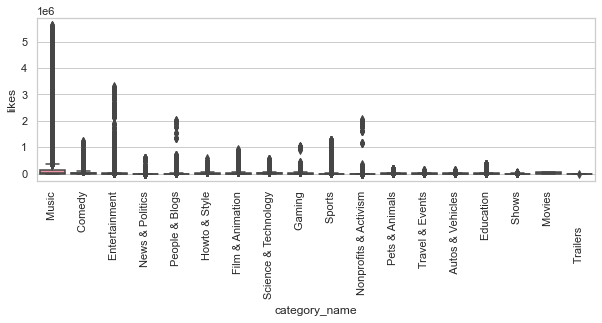

<Figure size 432x288 with 0 Axes>

In [52]:
# Now it's time to create a box plot to see which category have most likes on YouTube:
plt.figure(figsize = (10,3))
sns.boxplot(data = df, x = 'category_name', y = 'likes')
plt.xticks(rotation = 'vertical')
plt.show()
plt.savefig('mostlikes.png')

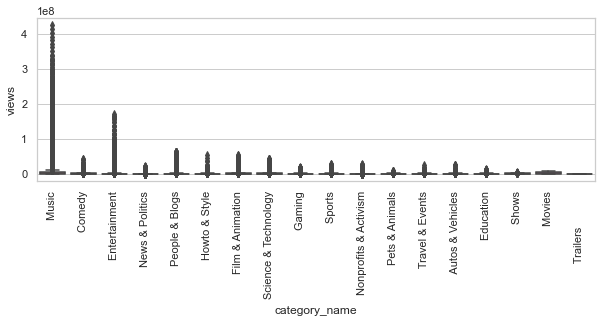

In [53]:
# We can finding out which categories have most views also:
plt.figure(figsize = (10,3))
sns.boxplot(data = df, x = 'category_name', y = 'views')
plt.xticks(rotation = 'vertical')
plt.savefig('mostviews.png')
plt.show()

#### Comment: From the box plot above, we can see that Music and Entertainment category have videos which have the maximum views and likes on YouTube. That mean most of people come to YouTube to enjoy the music videos and relax by entertainment ones. Trailers have less views and likes becaus they are not released frequently, and people may consider them as advertise videos.
#### If you want to have a better chance to have more views or likes on YouTube, try to make music contents such as create new songs, cover or remix famous songs with your own styles, realease your high quality MV... Or you can try entertainment content like doing some challenges, interesting things happen in your day, react to another videos...

### 4.Finding out whether the audience reacted with the videos or not

In [54]:
df['likes_rate'] = df['likes']/df['views']*100
df['dislikes_rate'] = df['dislikes']/df['views']*100
df['comment_count_rate'] = df['comment_count']/df['views']*100

In [55]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,likes_rate,dislikes_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752


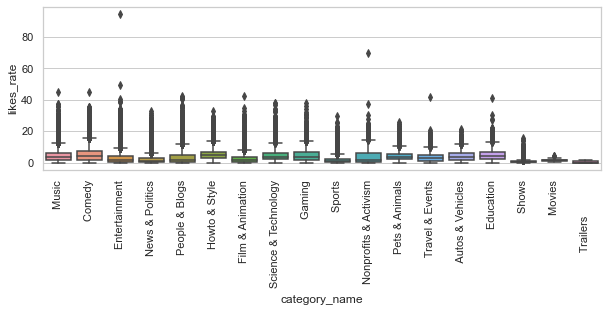

In [90]:
plt.figure(figsize = (10,3))
sns.boxplot(data = df, x= 'category_name', y = 'likes_rate')
plt.xticks(rotation = 'vertical')
plt.show()

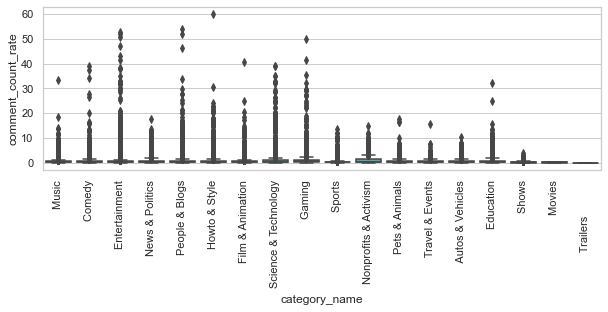

In [91]:
plt.figure(figsize = (10,3))
sns.boxplot(data = df, x= 'category_name', y = 'comment_count_rate')
plt.xticks(rotation = 'vertical')
plt.show()

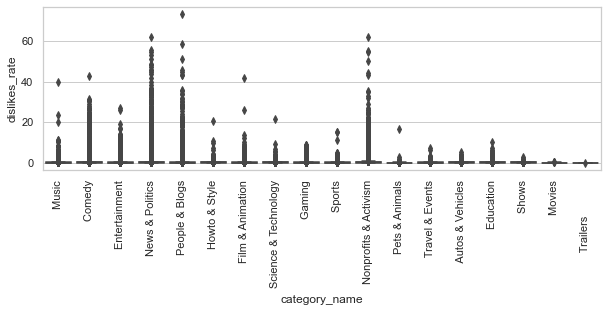

In [92]:
plt.figure(figsize = (10,3))
sns.boxplot(data = df, x= 'category_name', y = 'dislikes_rate')
plt.xticks(rotation = 'vertical')
plt.show()

#### Comment: 3 box plots above show us how the viewers reacted to the videos. People used like button more frequently than dislike or leaving a comment. I can say that it is easier to like a video than dislike or comment on it. Because if people don't really like the video, even they hate it, they just can ignore it and watch another one which is more interesting. Some categories like 'News and Politic', 'People and Blogs', 'Nonprofit and Activism' which have high oppotunity to offense someone; or 'Entertainment', 'Gaming', 'Sience & Technology' which have rich contents for people to discuss, they have higher dislike rate or comment rate than others.
#### We can look at 'Gaming' and 'Sience & Technology' categories, they have high rate of like and comment but low rate of dislike. These categories are really adtractive and being loved by the people.So if you want your viewers have good reactions on your videos, try create videos about gaming, science or technology.

In [58]:
# Analysing relationship between views and likes (dislikes, comment count):

In [59]:
df[['views', 'likes', 'dislikes', 'comment_count']]

,views,likes,dislikes,comment_count
0,17158579,787425,43420,125882
1,1014651,127794,1688,13030
2,3191434,146035,5339,8181
3,2095828,132239,1989,17518
4,33523622,1634130,21082,85067
...,...,...,...,...
40944,1685609,38160,1385,2657
40945,1064798,60008,382,3936
40946,1066451,48068,1032,3992
40947,5660813,192957,2846,13088


<AxesSubplot:>

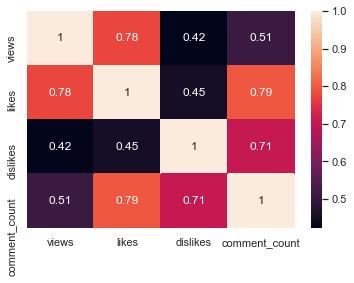

In [60]:
sns.heatmap(df[['views', 'likes', 'dislikes', 'comment_count']].corr(), annot = True)

In [61]:
## --> Views have a good correlation with Likes and have a poor correlation with Dislikes

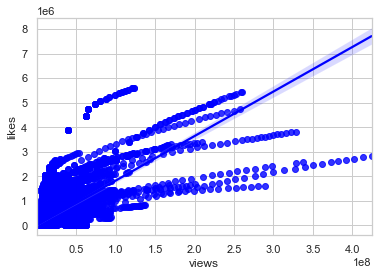

In [62]:
sns.regplot(data = df, x= 'views', y= 'likes', color= 'blue')
plt.show()

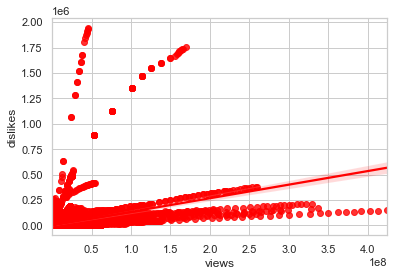

In [63]:
sns.regplot(data = df, x= 'views', y= 'dislikes', color= 'red')
plt.show()

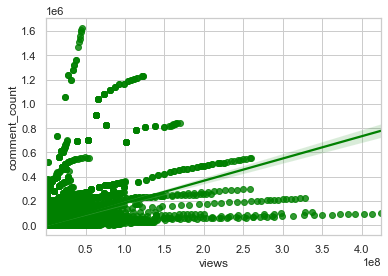

In [64]:
sns.regplot(data = df, x= 'views', y= 'comment_count', color= 'green')
plt.show()

### 5. Which YouTube channels have the largest number of videos?

In [65]:
# Create a data containing channel titles and the number of their videos
df_chan = df.copy()

In [66]:
df_chan = df_chan.groupby('channel_title')['video_id'].count().sort_values(ascending = False)

In [67]:
top10_chan = df_chan.head(10)

In [68]:
top10_chan

channel_title
The Late Show with Stephen Colbert        984
WWE                                       804
Late Night with Seth Meyers               773
VikatanTV                                 763
TheEllenShow                              743
Jimmy Kimmel Live                         707
The Tonight Show Starring Jimmy Fallon    705
PewDiePie                                 652
RadaanMedia                               651
The Late Late Show with James Corden      583
Name: video_id, dtype: int64

In [69]:
top10_chan = top10_chan.to_frame().reset_index().rename(columns = {'video_id':'total_video'})

In [70]:
top10_chan

,channel_title,total_video
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
5,Jimmy Kimmel Live,707
6,The Tonight Show Starring Jimmy Fallon,705
7,PewDiePie,652
8,RadaanMedia,651
9,The Late Late Show with James Corden,583


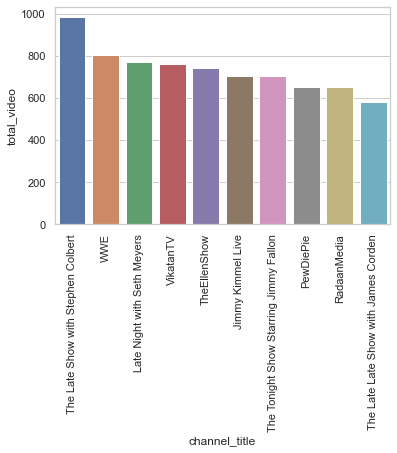

In [71]:
# Using bar plot to analyse the data:
sns.barplot(data= top10_chan, x = 'channel_title', y = 'total_video')
plt.xticks(rotation = 'vertical')
plt.show()

#### Comment: It is obviously that the 'Late-night talk show' kinds such as 'The Late Show with Stephen Colbert', 'Late Night with Seth Meyers', 'TheEllenShow', 'Jimmy Kimmel Live'... have the lagrest number of videos. 'Late-night talk show' programs are very familiar with American since 1950s. And now they airs on YouTube mostly, so they have to release videos frequently to satisfy demand of audience. Most of these channels have a large investment and professional staff team. So as an individual YouTuber, you can pay attention to PewDiePie channel. PewDiePie is an YouTuber himself, he's making videos about gaming and his channel in the top biggest channel on YouTube.

In [73]:
#Using plotly:

In [74]:
import plotly.express as px

In [75]:
px.bar(data_frame = top10_chan, x = 'channel_title', y = 'total_video')

### 7. Does Punctuations in title and tags have any relation with views, likes, dislikes comments?

In [76]:
import string

In [77]:
def count_punctuation(x):
    return len([i for i in x if i in string.punctuation])

In [78]:
sample = df.head(10000)

In [79]:
sample['punctuation'] = sample['title'].apply(count_punctuation)

In [80]:
sample.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,likes_rate,dislikes_rate,comment_count_rate,punctuation
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639,4
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342,3
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851,3
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752,3


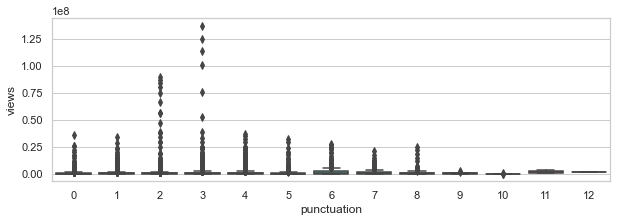

In [102]:
plt.figure(figsize = (10,3))
sns.boxplot(data = sample, x = 'punctuation', y = 'views')
plt.show()

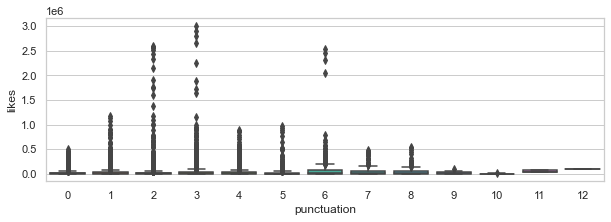

In [103]:
plt.figure(figsize = (10,3))
sns.boxplot(data = sample, x = 'punctuation', y = 'likes')
plt.show()

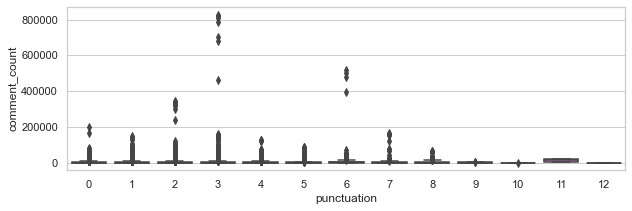

In [104]:
plt.figure(figsize = (10,3))
sns.boxplot(data = sample, x = 'punctuation', y = 'comment_count')
plt.show()

#### Comment: These chart show us that videos having 1-3 punctuations in their titles have more views, likes, and comments from the audience. It will make your title more adtractive and diferent from other videos. But using more than 8 punctuations in your video title can make the audience feel it's compicated and uncomfortable, so they could ignore your video.

In [97]:
df[df['views'] == df['views'].min()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,likes_rate,dislikes_rate,comment_count_rate
14945,PcIF_Z-IQgk,18.29.01,ÐÐ°Ð²Ð°Ð»ÑÐ½ÑÐ¹ ÑÐ´ÑÐ»ÑÑ. ÐÐ½Ð°Ð»Ð¸ Ð»...,ÐÐ²Ð»Ð½Ð¹ Ð¥Ð»Ð¾ 2.0,22,2018-01-29T05:32:10.000Z,#ÐÐ°Ð²Ð°Ð»ÑÐ½ÑÐ¹ #ÐÐµÑÐ°ÐÐ°Ð²Ð°Ð»ÑÐ½ÑÐ...,117,4,2,13,https://i.ytimg.com/vi/PcIF_Z-IQgk/default.jpg,False,False,False,28.01.18 ÐÐ¾ Ð²ÑÐµÐ¼Ñ Ð¿Ð¾ÑÐ»ÐµÐ´Ð½ÐµÐ¹ Ñ...,People & Blogs,3.418803,1.709402,11.111111


In [98]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'